# Data Preprocessing

In [81]:
# Important libraries
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import csv
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# File paths
fp_notebooks_folder = "./"
fp_code_folder = "../"
fp_processed_folder = os.path.join(fp_code_folder, "../processed_data")
fp_converted_folder = os.path.join(fp_code_folder, "../processed_data", "converted_to_csv")
fp_fields_file = os.path.join(fp_converted_folder, "fields.csv")

In [9]:
# Get fields file to analyse
fields_df = pd.read_csv(fp_fields_file, quoting=csv.QUOTE_NONE, escapechar='/', index_col=0)
fields_df

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE ': 23, '*TACHY 216 > 180 ':...",048n
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180 ': 115, 'ABP 182 > 180 ': ...",052n
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs ': 982, 'HR 53 < 55 ': ...",054n
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN ': 1661, 'PAIR VPBs ':...",055n
4,0.976562,4606,5,1995-01-24,08:22:11,"['mmHg', 'mmHg', 'mmHg', 'bpm', '%']","['NBPmean', 'NBPsys', 'NBPdias', 'RESP', 'SpO2']",[],{'MULTIFORM VPBs ': 4600},208n
...,...,...,...,...,...,...,...,...,...,...
111,0.976562,151176,14,1996-04-06,15:26:26,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'VPBs > 5/MIN \r': 20341, 'VPBs > 11/MIN \...",482n
112,0.976562,147656,15,1996-04-22,17:35:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'IRREGULAR HR \r': 19031, 'MULTIFORM VPBs \...",484n
113,0.976562,154687,12,1996-04-29,14:48:52,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'PAIR VPBs \r': 731, 'VPBs > 11/MIN \r'...",485n
114,0.976562,193946,18,1996-05-02,11:54:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'PAIR VPBs \r': 4158, 'RUN VPBs 3 - 9 \r...",486n


In [48]:
def add_feat_names(fields_df):
    feat_names = []
    for i in range(len(fields_df)):
        row = fields_df.iloc[i]
        units_list, sig_list = eval(row["units"]), eval(row["sig_name"])
        cur_feat_names = {sig_list[j] + " (" + units_list[j] + ")" for j in range(len(units_list))}
        feat_names.append(cur_feat_names)
    return feat_names

fields_df["feat_cols"] = add_feat_names(fields_df)
fields_df

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE ': 23, '*TACHY 216 > 180 ':...",048n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180 ': 115, 'ABP 182 > 180 ': ...",052n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs ': 982, 'HR 53 < 55 ': ...",054n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN ': 1661, 'PAIR VPBs ':...",055n,"{PAPsys (mmHg), HR (bpm), PAPmean (mmHg), PULS..."
4,0.976562,4606,5,1995-01-24,08:22:11,"['mmHg', 'mmHg', 'mmHg', 'bpm', '%']","['NBPmean', 'NBPsys', 'NBPdias', 'RESP', 'SpO2']",[],{'MULTIFORM VPBs ': 4600},208n,"{NBPmean (mmHg), SpO2 (%), RESP (bpm), NBPdias..."
...,...,...,...,...,...,...,...,...,...,...,...
111,0.976562,151176,14,1996-04-06,15:26:26,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'VPBs > 5/MIN \r': 20341, 'VPBs > 11/MIN \...",482n,"{CVP (mmHg), PAPsys (mmHg), HR (bpm), PAPmean ..."
112,0.976562,147656,15,1996-04-22,17:35:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'IRREGULAR HR \r': 19031, 'MULTIFORM VPBs \...",484n,"{CVP (mmHg), LAP (mmHg), PAPsys (mmHg), HR (bp..."
113,0.976562,154687,12,1996-04-29,14:48:52,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'PAIR VPBs \r': 731, 'VPBs > 11/MIN \r'...",485n,"{CVP (mmHg), PAPsys (mmHg), HR (bpm), PAPmean ..."
114,0.976562,193946,18,1996-05-02,11:54:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'PAIR VPBs \r': 4158, 'RUN VPBs 3 - 9 \r...",486n,"{CVP (mmHg), PAPsys (mmHg), HR (bpm), PAPmean ..."


## Select Feature Set

In [50]:
# Check what are the most common subset of features
def most_comment_subset_of_features(fields_df):
    feat_set_series = fields_df["feat_cols"]
    feat_set_counts = feat_set_series.value_counts().reset_index()
    feat_set_counts.columns = ["feat_set", "count"]
    feat_set_counts["num_features"] = [len(feat_set) for feat_set in feat_set_counts["feat_set"]]
    feat_set_counts = feat_set_counts.sort_values("num_features", ascending=True)
    num_unique_feat_sets = len(feat_set_counts)
    
    feat_set_inc_list = []
    for i in range(num_unique_feat_sets):
        total_count = 0
        potential_subset = feat_set_counts["feat_set"].iloc[i]
        for j in range(i,num_unique_feat_sets):
            potential_superset, count = feat_set_counts[["feat_set","count"]].iloc[j].values
            if potential_subset.issubset(potential_superset):
                total_count += count
        feat_set_inc_list.append({"feat_set": potential_subset, "inc_count": total_count})
    
    feat_set_inc_df = pd.DataFrame(feat_set_inc_list)
    
    return feat_set_counts, feat_set_inc_df.sort_values("inc_count", ascending=False)
feat_set_stats = most_comment_subset_of_features(fields_df)
display(feat_set_stats[0])
display(feat_set_stats[1])

,feat_set,count,num_features
39,{RESP (bpm)},1,1
1,"{RESP (bpm), SpO2 (%)}",12,2
35,"{C.O. (lpm), Tblood (degC), SpO2 (%)}",1,3
4,"{C.O. (lpm), Tblood (degC), SpO2 (%), RESP (bpm)}",6,4
32,"{SpO2 (%), ETCO2 (mmHg), RESP (bpm), IMCO2 (mm...",1,5
5,"{NBPmean (mmHg), SpO2 (%), RESP (bpm), NBPdias...",4,5
10,"{C.O. (lpm), SpO2 (%), RESP (bpm), Tblood (deg...",2,5
16,"{HR (bpm), SpO2 (%), RESP (bpm), ABPmean (mmHg...",2,6
40,"{HR (bpm), NBPmean (mmHg), PULSE (bpm), RESP (...",1,6
14,"{HR (bpm), NBPmean (mmHg), PULSE (bpm), SpO2 (...",2,7


,feat_set,inc_count
0,{RESP (bpm)},90
1,"{RESP (bpm), SpO2 (%)}",88
7,"{HR (bpm), SpO2 (%), RESP (bpm), ABPmean (mmHg...",57
11,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ...",48
2,"{C.O. (lpm), Tblood (degC), SpO2 (%)}",37
16,"{PAPsys (mmHg), HR (bpm), PAPmean (mmHg), PULS...",35
5,"{NBPmean (mmHg), SpO2 (%), RESP (bpm), NBPdias...",32
20,"{PAPsys (mmHg), HR (bpm), PAPmean (mmHg), PULS...",27
8,"{HR (bpm), NBPmean (mmHg), PULSE (bpm), RESP (...",24
9,"{HR (bpm), NBPmean (mmHg), PULSE (bpm), SpO2 (...",23


In [51]:
feat_set = feat_set_stats[1].iloc[2][0]
# Check above count
def check_feat_set_count(fields_df, cur_feat_set):
    feat_set_series = fields_df["feat_cols"]
    count = 0
    for fs in feat_set_series:
        if cur_feat_set.issubset(fs):
            count += 1
    return count
check_feat_set_count(fields_df, cur_feat_set=feat_set)

57

In [113]:
# Shortlist patients with feat_set
def shortlist_patients_with_feat_set(fields_df, cur_feat_set):
    feat_set_series = fields_df["feat_cols"]
    records = []
    for i, fs in enumerate(feat_set_series):
        if cur_feat_set.issubset(fs):
            records.append(fields_df["record"].iloc[i])
    return records
shortlisted_records = shortlist_patients_with_feat_set(fields_df, cur_feat_set=feat_set)
print(len(shortlisted_records), "Records:", shortlisted_records)

57 Records: ['048n', '052n', '054n', '055n', '211n', '212n', '213n', '214n', '216n', '220n', '221n', '226n', '230n', '231n', '232n', '235n', '237n', '240n', '241n', '242n', '243n', '245n', '248n', '252n', '253n', '254n', '259n', '260n', '264n', '267n', '268n', '269n', '271n', '291n', '293n', '401n', '403n', '408n', '409n', '413n', '414n', '415n', '417n', '418n', '427n', '442n', '449n', '455n', '457n', '464n', '465n', '466n', '467n', '471n', '472n', '474n', '476n']


In [53]:
fields_df_shortlisted = fields_df[fields_df["record"].isin(shortlisted_records)]
fields_df_shortlisted

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE ': 23, '*TACHY 216 > 180 ':...",048n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180 ': 115, 'ABP 182 > 180 ': ...",052n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs ': 982, 'HR 53 < 55 ': ...",054n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN ': 1661, 'PAIR VPBs ':...",055n,"{PAPsys (mmHg), HR (bpm), PAPmean (mmHg), PULS..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs ': 328, 'HR 126 > 120 ': ...",211n,"{HR (bpm), SpO2 (%), RESP (bpm), ABPmean (mmHg..."
8,0.976562,145275,10,1995-04-04,14:00:03,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PAPmea...",[],"{'VPBs > 5/MIN ': 11644, 'MISSED BEATS '...",212n,"{PAPsys (mmHg), HR (bpm), PAPmean (mmHg), PULS..."
9,0.976562,171093,7,1995-04-06,09:17:44,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'VPBs > 5/MIN \r': 3536, 'ABP 87 < 90 \r...",213n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
10,0.976562,90157,10,1995-04-19,07:14:25,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'NBPmea...",[],"{'RUN VPBs > 2 ': 3855, 'PAIR VPBs ':...",214n,"{HR (bpm), NBPmean (mmHg), NBPsys (mmHg), PULS..."
12,0.976562,95654,16,1995-05-07,14:11:32,"['mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmHg...","['ABPmean', 'ABPsys', 'ABPdias', 'ARTmean', 'A...",[],"{'VENT TRIGEMINY \r': 483, 'VPBs > 5/MIN \r'...",216n,"{PAPsys (mmHg), HR (bpm), NBPmean (mmHg), NBPs..."
15,0.976562,4101,7,1995-05-17,08:26:10,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],{'MULTIFORM VPBs \r': 309},220n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."


In [54]:
fields_df_shortlisted.head()

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE ': 23, '*TACHY 216 > 180 ':...",048n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180 ': 115, 'ABP 182 > 180 ': ...",052n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs ': 982, 'HR 53 < 55 ': ...",054n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN ': 1661, 'PAIR VPBs ':...",055n,"{PAPsys (mmHg), HR (bpm), PAPmean (mmHg), PULS..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs ': 328, 'HR 126 > 120 ': ...",211n,"{HR (bpm), SpO2 (%), RESP (bpm), ABPmean (mmHg..."


## Select Alarms to Predict

In [100]:
def most_common_alarms(fields_df_shortlisted):
    alarm_col = fields_df_shortlisted["unique_alarms"]
    alarm_count = {}
    num_shortlisted = len(fields_df_shortlisted)
    for i in range(num_shortlisted):
        unique_alarms_dict = eval(alarm_col.iloc[i])
        for alarm, count in unique_alarms_dict.items():
            alarm = alarm.strip()
            if alarm in alarm_count:
                alarm_count[alarm] += count
            else:
                alarm_count[alarm] = count
    alarm_series = pd.Series(alarm_count).sort_values(ascending=False).reset_index()
    alarm_series["index"] = alarm_series["index"]
    alarm_series.columns = ["alarms", "count"]
    return alarm_series

alarm_count = most_common_alarms(fields_df_shortlisted)
alarm_count.head(10)

,alarms,count
0,PAIR VPBs,165344
1,MULTIFORM VPBs,159343
2,IRREGULAR HR,96848
3,VPBs > 5/MIN,95106
4,VPBs > 8/MIN,94262
5,MISSED BEATS,61802
6,RUN VPBs > 2,47527
7,VENT RHYTHM,10349
8,*VENT TACHY,10286
9,R-ON-T VPBs,7655


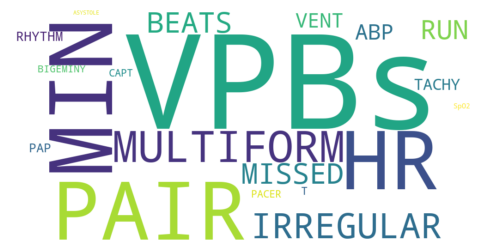

In [95]:
# Show word cloud of alarms
def generate_alarm_wordcloud(alarm_count):
    text = " ".join(alarm for alarm, count in alarm_count[["alarms", "count"]].values for j in range(count))
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        width=1000, height=500, stopwords=stopwords, background_color="white", collocations=False, max_words=20).generate(text)
    plt.figure(figsize=(6,3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
generate_alarm_wordcloud(alarm_count)

In [103]:
# find out how many alarms with "VPB" in it
def query_alarm_count(alarm_count, keyword):
    alarm_list = []
    total_count = 0
    for alarm, count in alarm_count[["alarms", "count"]].values:
        if keyword in alarm:
            alarm_list.append(alarm)
            total_count += count 
    return alarm_count[alarm_count["alarms"].isin(alarm_list)], total_count
vpb_alarm_stats = query_alarm_count(alarm_count, keyword="VPB")
print(vpb_alarm_stats[1], "VPBs:")
display(vpb_alarm_stats[0])

584358 VPBs:


,alarms,count
0,PAIR VPBs,165344
1,MULTIFORM VPBs,159343
3,VPBs > 5/MIN,95106
4,VPBs > 8/MIN,94262
6,RUN VPBs > 2,47527
9,R-ON-T VPBs,7655
10,VPBs > 5/MIN,6642
14,RUN VPBs 3 - 9,4397
22,VPBs > 11/MIN,2172
24,RUN VPBs > 5,1900


In [106]:
# How many patients have vpb
def query_records_with_alarm_keyword(fields_df_shortlisted, keyword_list):
    df_list = []
    for keyword in keyword_list:
        count = 0
        record_list = []
        for record, alarm_str in fields_df_shortlisted[["record","unique_alarms"]].values:
            if keyword in alarm_str:
                count += 1
                record_list.append(record)
        df_list.append({"keyword": keyword, "count":count, "records": record_list})
    return pd.DataFrame(df_list)
vbp_record_stats = query_records_with_alarm_keyword(fields_df_shortlisted, keyword_list=["VPB"]+vpb_alarm_stats[0]["alarms"].tolist())
vbp_record_stats

,keyword,count,records
0,VPB,49,"[048n, 054n, 055n, 211n, 212n, 213n, 214n, 216..."
1,PAIR VPBs,39,"[048n, 054n, 055n, 211n, 213n, 214n, 216n, 221..."
2,MULTIFORM VPBs,33,"[054n, 055n, 213n, 214n, 220n, 221n, 226n, 230..."
3,VPBs > 5/MIN,26,"[211n, 212n, 213n, 214n, 216n, 230n, 231n, 232..."
4,VPBs > 8/MIN,1,[264n]
5,RUN VPBs > 2,22,"[212n, 213n, 214n, 230n, 232n, 235n, 237n, 240..."
6,R-ON-T VPBs,13,"[214n, 232n, 245n, 252n, 253n, 259n, 260n, 418..."
7,VPBs > 5/MIN,7,"[055n, 226n, 408n, 409n, 442n, 457n, 472n]"
8,RUN VPBs 3 - 9,9,"[048n, 055n, 226n, 408n, 442n, 455n, 457n, 472..."
9,VPBs > 11/MIN,3,"[409n, 457n, 472n]"


In [118]:
# Shortlist patients with alarm
def shortlist_patients_with_alarm(vbp_record_stats, keyword):
    record_list = vbp_record_stats[vbp_record_stats["keyword"]==keyword]["records"][0]
    return record_list
shortlisted_records_alarm = shortlist_patients_with_alarm(vbp_record_stats, keyword="VPB")
fields_df_shortlisted_alarm = fields_df_shortlisted[fields_df_shortlisted["record"].isin(shortlisted_records_alarm)]
display(fields_df_shortlisted_alarm.head())
print(fields_df_shortlisted_alarm.shape)

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE ': 23, '*TACHY 216 > 180 ':...",048n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs ': 982, 'HR 53 < 55 ': ...",054n,"{HR (bpm), PULSE (bpm), SpO2 (%), RESP (bpm), ..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN ': 1661, 'PAIR VPBs ':...",055n,"{PAPsys (mmHg), HR (bpm), PAPmean (mmHg), PULS..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs ': 328, 'HR 126 > 120 ': ...",211n,"{HR (bpm), SpO2 (%), RESP (bpm), ABPmean (mmHg..."
8,0.976562,145275,10,1995-04-04,14:00:03,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PAPmea...",[],"{'VPBs > 5/MIN ': 11644, 'MISSED BEATS '...",212n,"{PAPsys (mmHg), HR (bpm), PAPmean (mmHg), PULS..."


(49, 11)


In [120]:
# 6.22 million rows in total (with nan values)
fields_df_shortlisted_alarm["sig_len"].sum() 

6227307

## Downsample Time Series Data

In [191]:
def downsample_all_csvs(fp_converted_folder, feat_set, fields_df_shortlisted, window=60):
    df_list = []
    records = fields_df_shortlisted["record"].tolist()
    for record in tqdm(records):
        fp_csv = os.path.join(fp_converted_folder, record+".csv")
        df = pd.read_csv(fp_csv)
        df = downsample_ts(df, window, feat_set)
        df["record"] = record
        df_list.append(df)
    all_df = pd.concat(df_list).reset_index()
    all_df.columns = ["record_index"] + all_df.columns[1:].to_list()
    return all_df

def downsample_ts(df, window, feat_set, alarm_col="alarms"):
    df[alarm_col] = df[alarm_col].str.strip()
    feat_set = list(feat_set)
    all_feat = feat_set + [alarm_col]
    df_feat_sel = df[all_feat]
    grouped = df_feat_sel.groupby((df_feat_sel.index/window).astype('i'))
    df_downsampled = grouped[feat_set].mean()
    alarm_list = []
    for group, alarms in grouped[alarm_col]:
        alarm_set = set(alarms[alarms.notna()])
        alarm_list.append(alarm_set)
    df_downsampled["alarms"] = alarm_list
    
    return df_downsampled

df_ds = downsample_all_csvs(fp_converted_folder, feat_set, fields_df_shortlisted, window=60)
df_ds

  2%|█▉                                                                                                           | 1/57 [00:00<00:16,  3.41it/s]C:\Users\WLR\AppData\Local\Temp\ipykernel_22048\4246302269.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv)
  5%|█████▋                                                                                                       | 3/57 [00:01<00:31,  1.69it/s]C:\Users\WLR\AppData\Local\Temp\ipykernel_22048\4246302269.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv)
 21%|██████████████████████▋                                                                                     | 12/57 [00:07<00:23,  1.89it/s]C:\Users\WLR\AppData\Local\Temp\ipykernel_22048\4246302269.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read

,record_index,HR (bpm),SpO2 (%),RESP (bpm),ABPmean (mmHg),ABPdias (mmHg),ABPsys (mmHg),alarms,record
0,0,63.850000,96.300000,0.0,84.800000,67.416667,120.483333,{},048n
1,1,83.416667,93.600000,0.0,86.033333,63.300000,127.183333,{},048n
2,2,82.466667,93.366667,0.0,83.350000,59.100000,125.050000,{},048n
3,3,83.950000,93.150000,0.0,88.850000,63.833333,131.766667,{},048n
4,4,87.183333,82.400000,0.0,109.400000,86.066667,156.550000,{},048n
...,...,...,...,...,...,...,...,...,...
120149,1031,91.900000,96.716667,NaN,NaN,NaN,NaN,{},476n
120150,1032,81.150000,97.100000,NaN,NaN,NaN,NaN,{IRREGULAR HR},476n
120151,1033,96.366667,96.650000,NaN,NaN,NaN,NaN,{IRREGULAR HR},476n
120152,1034,94.850000,96.716667,NaN,NaN,NaN,NaN,{IRREGULAR HR},476n


In [192]:
df_ds["alarms"].value_counts()

alarms
{}                                                                                                                                                                                                                                                                     101973
{PAIR VPBs}                                                                                                                                                                                                                                                              2810
{MULTIFORM VPBs}                                                                                                                                                                                                                                                         2724
{IRREGULAR HR}                                                                                                                                                                         